In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

from scipy import stats
from ast import literal_eval

Populating the interactive namespace from numpy and matplotlib


In [2]:
genes = pd.read_csv('gene_expression_s.csv', index_col=0).sort_index(0).sort_index(1)
sample_data = pd.read_csv('sample_info_qc.csv', index_col=0).sort_index(0).sort_index(1)

GFP = genes.ix['GFP']
sample_data = sample_data.ix[sample_data["Pass QC"]]
sample_data = sample_data.query('cluster != "x"')
genes = genes[sample_data.index]

sample_data.cluster_color = sample_data.cluster_color.map(literal_eval)

## Cell progression ordering

Use the three components from ICA (not related to the outliers) to order cells by progression

In [3]:
ica = sample_data[['within_small_component', 'difference_component', 'within_large_component']]

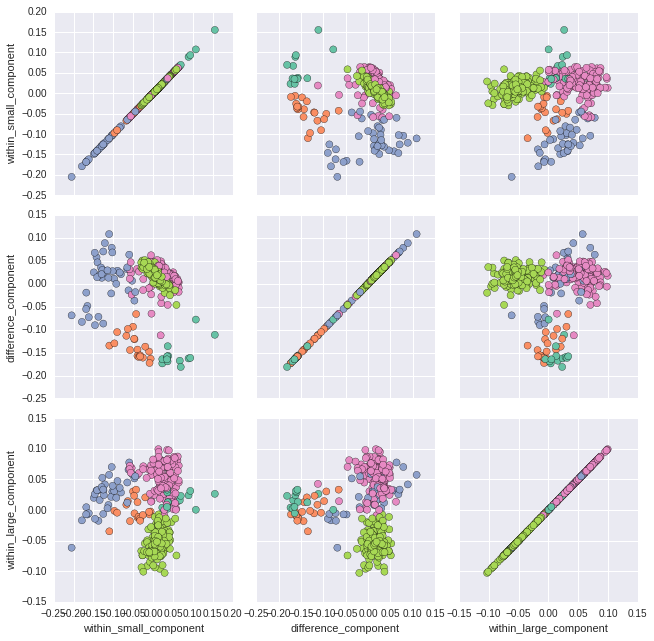

In [4]:
g = sns.PairGrid(ica)
g.map(scatter, color=sample_data.cluster_color, edgecolor='k', s=50)

Compare clusters to average GFP progression

(Note that before this procedure the clusters had different names, we renamed them to the order numbers after this to keep the plots consistant)

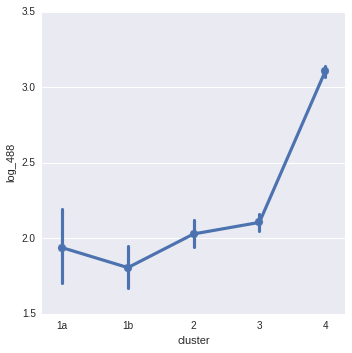

In [5]:
sns.factorplot('cluster', 'log_488', data=sample_data);

In [6]:
c1_data = sample_data.query('cluster == "1a" | cluster == "1b"')

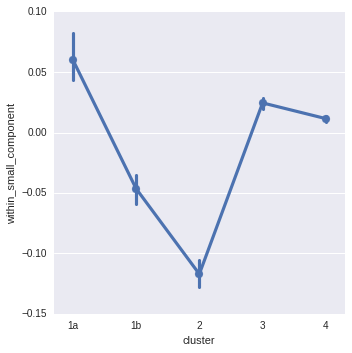

In [7]:
sns.factorplot('cluster', 'within_small_component', data=sample_data);

Flip cluster 1 component based on the plot

In [8]:
c1_pt = c1_data['within_small_component']
c1_pt *= -1
c1_pt -= c1_pt.min()

In [9]:
c2_data = sample_data.query('cluster == "2"')

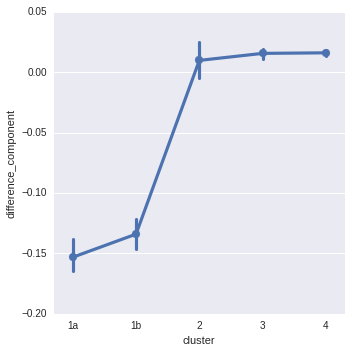

In [10]:
sns.factorplot('cluster', 'difference_component', data=sample_data);

Put cluster 2 after cluster 1, no need to flip

In [11]:
c2_pt = c2_data['difference_component']
c2_pt = c2_pt - c2_pt.min() + c1_pt.max()

In [12]:
c34_data = sample_data.query('cluster == "3" | cluster == "4"')

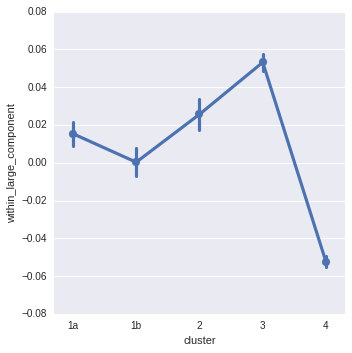

In [13]:
sns.factorplot('cluster', 'within_large_component', data=sample_data);

Flip component explaining cluster 3 and 4 variability, and put scores after cluster 2

In [14]:
c34_pt = c34_data['within_large_component']
c34_pt *= -1
c34_pt = c34_pt - c34_pt.min() + c2_pt.max()

In [15]:
sample_data['pseudotime'] = np.nan
sample_data.ix[c1_pt.index, 'pseudotime'] = c1_pt
sample_data.ix[c2_pt.index, 'pseudotime'] = c2_pt
sample_data.ix[c34_pt.index, 'pseudotime'] = c34_pt

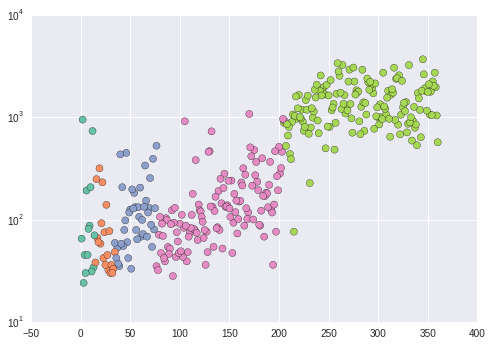

In [16]:
plt.scatter(sample_data['pseudotime'].rank(),
            sample_data['488'],
            color=sample_data['cluster_color'], s=50, edgecolor='k');

plt.yscale('log');

## Make psuedotime plots for genes of interest

In [17]:
tf_list =[
'ENSDARG00000003732',
'ENSDARG00000037833',
'ENSDARG00000020746',
'ENSDARG00000044457',
'ENSDARG00000067797',
'ENSDARG00000000767',
'ENSDARG00000091603',
'ENSDARG00000012078',
'ENSDARG00000002937',
'ENSDARG00000095019',
'ENSDARG00000054632',
'ENSDARG00000077304',
'ENSDARG00000087646',
'ENSDARG00000025921',
'ENSDARG00000010137',
'ENSDARG00000019930',
'ENSDARG00000059327',
'ENSDARG00000020606',
'ENSDARG00000079012',
'ENSDARG00000079947',
'ENSDARG00000013477',
'ENSDARG00000059130',
'ENSDARG00000053666',
]

In [18]:
ercc_idx = filter(lambda i: 'ERCC' in i, genes.index)
egenes = genes.drop(ercc_idx)
egenes = egenes.drop('GFP')
egenes = (egenes / egenes.sum()) * 1e6

gene_annotation = pd.read_csv('zv9_gene_annotation.txt', sep='\t', index_col=0)
gene_annotation = gene_annotation.ix[egenes.index]

In [19]:
gene_annotation.ix[tf_list]['Associated Gene Name']

0
ENSDARG00000003732             mitfa
ENSDARG00000037833             mitfb
ENSDARG00000020746            gfi1aa
ENSDARG00000044457            gfi1ab
ENSDARG00000067797             spi1a
ENSDARG00000000767             spi1b
ENSDARG00000091603              LYL1
ENSDARG00000012078             meis1
ENSDARG00000002937          meis4.1a
ENSDARG00000095019              lmo2
ENSDARG00000054632             fli1a
ENSDARG00000077304               erg
ENSDARG00000087646    RUNX1 (2 of 2)
ENSDARG00000025921             runx1
ENSDARG00000010137             ldb1a
ENSDARG00000019930              tal1
ENSDARG00000059327            gata2a
ENSDARG00000020606              nfe2
ENSDARG00000079012           CBFA2T3
ENSDARG00000079947             gfi1b
ENSDARG00000013477            gata1a
ENSDARG00000059130            gata1b
ENSDARG00000053666              cmyb
Name: Associated Gene Name, dtype: object

In [20]:
gene_annotation.ix['ENSDARG00000045070']

Associated Gene Name            itgb3b
Chromosome Name                     12
Gene Start (bp)               28005509
Gene End (bp)                 28032775
Gene Biotype            protein_coding
Transcript count                     2
Name: ENSDARG00000045070, dtype: object

In [21]:
important_genes = [
'ENSDARG00000020746',
'ENSDARG00000044457',
'ENSDARG00000079947',
'ENSDARG00000067797',
'ENSDARG00000000767',
'ENSDARG00000091603',
'ENSDARG00000012078',
'ENSDARG00000002937',
'ENSDARG00000095019',
'ENSDARG00000054632',
'ENSDARG00000040080',
'ENSDARG00000077304',
'ENSDARG00000025921',
'ENSDARG00000087646',
'ENSDARG00000019930',
'ENSDARG00000013477',
'ENSDARG00000059130',
'ENSDARG00000059327',
'ENSDARG00000009094',
'ENSDARG00000053666',
'ENSDARG00000095019',
'ENSDARG00000041572',
'ENSDARG00000019521',
'ENSDARG00000045240',
'ENSDARG00000090638',
'ENSDARG00000086846',
'ENSDARG00000074441',
'ENSDARG00000062303',
'ENSDARG00000077231',
'ENSDARG00000042138',
'ENSDARG00000056767',
'ENSDARG00000045070'
]

In [22]:
gene_annotation.ix[important_genes]['Associated Gene Name']

0
ENSDARG00000020746            gfi1aa
ENSDARG00000044457            gfi1ab
ENSDARG00000079947             gfi1b
ENSDARG00000067797             spi1a
ENSDARG00000000767             spi1b
ENSDARG00000091603              LYL1
ENSDARG00000012078             meis1
ENSDARG00000002937          meis4.1a
ENSDARG00000095019              lmo2
ENSDARG00000054632             fli1a
ENSDARG00000040080             fli1b
ENSDARG00000077304               erg
ENSDARG00000025921             runx1
ENSDARG00000087646    RUNX1 (2 of 2)
ENSDARG00000019930              tal1
ENSDARG00000013477            gata1a
ENSDARG00000059130            gata1b
ENSDARG00000059327            gata2a
ENSDARG00000009094            gata2b
ENSDARG00000053666              cmyb
ENSDARG00000095019              lmo2
ENSDARG00000041572             zfpm1
ENSDARG00000019521               mpx
ENSDARG00000045240             cebp1
ENSDARG00000090638               GP9
ENSDARG00000086846        CU896563.2
ENSDARG00000074441             gp1bb

In [23]:
egenes = egenes[sample_data.index]

In [24]:
from itertools import cycle

In [25]:
gene_id = 'ENSDARG00000013477'

def prog_plot(gene_id):
    plt.scatter(sample_data['pseudotime'].rank(),
                np.log10(egenes[sample_data.index].ix[gene_id] + 1),
                color=sample_data['cluster_color'], edgecolor='k', s=50);

    tmp_df = sample_data.ix[:, ['cluster', 'pseudotime', 'cluster_color']]
    tmp_df['expression'] = egenes.ix[gene_id, sample_data.index]
    tmp_df['expressed'] = tmp_df['expression'] > 1

    cluster_group = tmp_df.groupby('cluster')
    expressed_in_cluster = cluster_group.sum()['expressed']
    cluster_size = cluster_group.size()
    fraction_expressing = expressed_in_cluster / cluster_size

    pst_locs = tmp_df.rank().groupby('cluster').mean()['pseudotime']
    cl_col = cluster_group.first()['cluster_color']

    yloc = cycle([np.log10(2e-1), np.log10(2e-1)])
    for fr, psl, clc in zip(fraction_expressing, pst_locs, cl_col):
        plt.text(psl, yloc.next(), '{:2.0%}'.format(fr),
                 color=clc,
                 horizontalalignment='center')

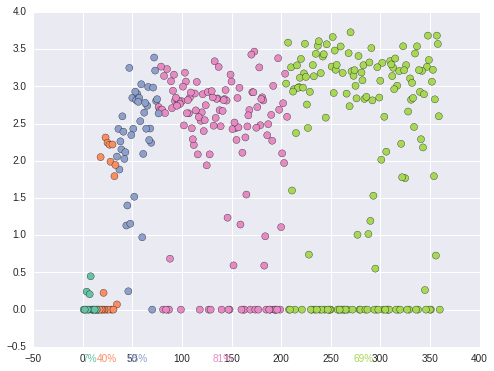

In [26]:
figsize(8, 6)
prog_plot(gene_id)

In [27]:
sns.set_context('talk')
sns.set_style('white')

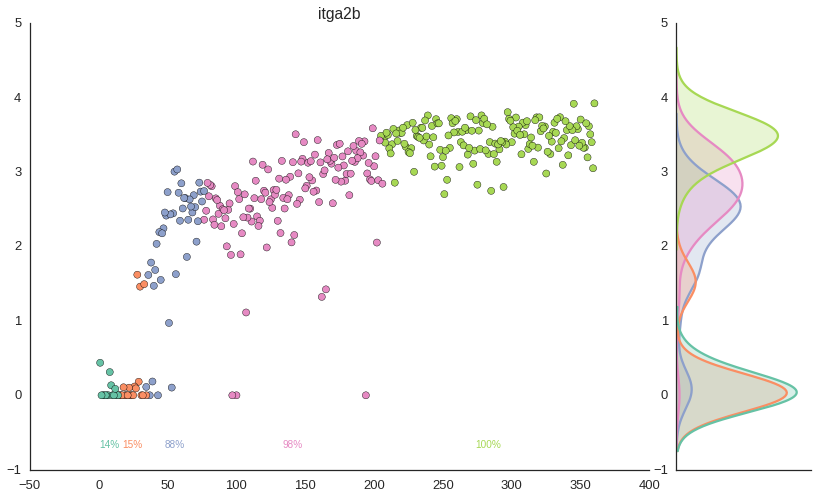

In [28]:
figsize(14, 8)
gene_id = 'ENSDARG00000018687'  # itga2b

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.title(gene_annotation['Associated Gene Name'][gene_id]);

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('');

sns.despine()

In [29]:
gene_annotation.ix[important_genes].to_csv('important_genes.csv')

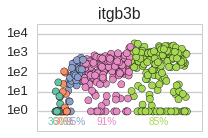

In [30]:
figsize(3, 2)
sns.set_style('whitegrid')

for gene_id in important_genes:
    plt.clf()
    prog_plot(gene_id)
    plt.ylim(-1, 4.5);

    plt.xticks([]);
    plt.yticks([0, 1, 2, 3, 4], ['1e0', '1e1', '1e2', '1e3', '1e4']);
    plt.title(gene_annotation['Associated Gene Name'][gene_id]);

    plt.tight_layout();
    plt.savefig('figures/grid_plots/' + gene_annotation['Associated Gene Name'][gene_id] + '.pdf')

In [31]:
marker_genes = [
'ENSDARG00000077760',  # ascc1
'ENSDARG00000070228',  # cdk6
'ENSDARG00000045843',  # apex1
'ENSDARG00000054155',  # pcna
'ENSDARG00000004169',  # stmn1a
'ENSDARG00000019845',  # pdlim
'ENSDARG00000042934',  # ctgfa
'ENSDARG00000010785',  # thbs1b
'ENSDARG00000055705',  # f5
]

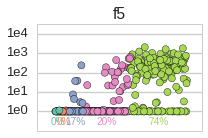

In [32]:
figsize(3, 2)
sns.set_style('whitegrid')

for gene_id in marker_genes:
    plt.clf()
    prog_plot(gene_id)
    plt.ylim(-1, 4.5);

    plt.xticks([]);
    plt.yticks([0, 1, 2, 3, 4], ['1e0', '1e1', '1e2', '1e3', '1e4']);
    plt.title(gene_annotation['Associated Gene Name'][gene_id]);

    plt.tight_layout();
    plt.savefig('figures/marker_plots/' + gene_annotation['Associated Gene Name'][gene_id] + '.pdf')

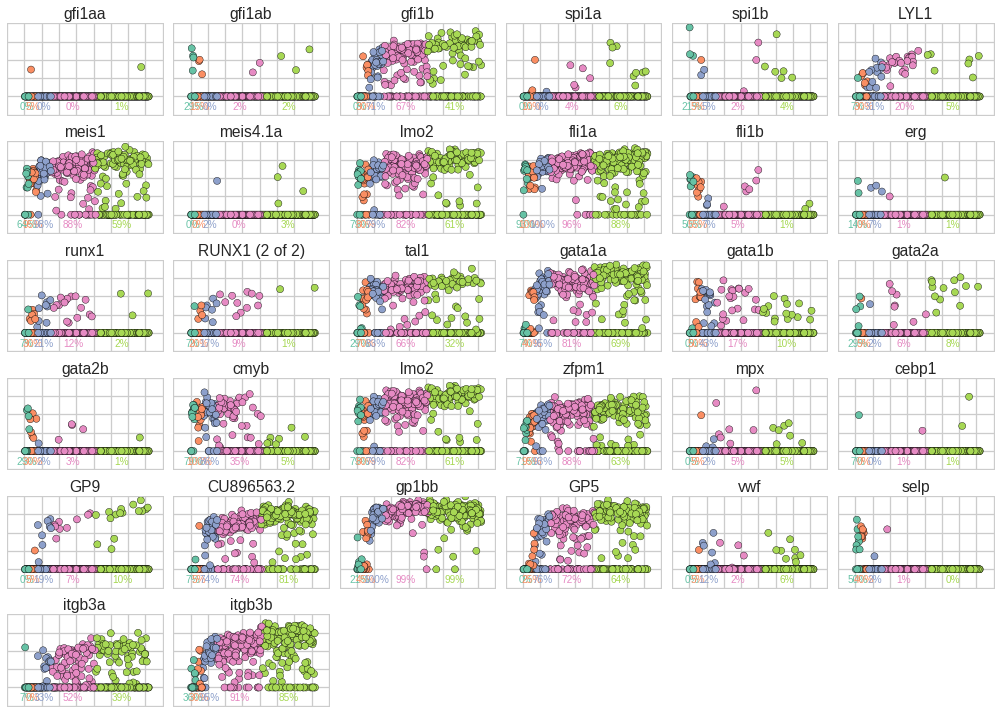

In [33]:
figsize(14, 10)
ax = None
for i, gene_id in enumerate(important_genes):
    if not ax:
        ax = plt.subplot(6, 6, i + 1)
    else:
        ax = plt.subplot(6, 6, i + 1, sharey=ax)

    prog_plot(gene_id)
    

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    plt.ylim(-1, 4)
    plt.title(gene_annotation['Associated Gene Name'][gene_id])
    
plt.tight_layout();

plt.savefig('figures/expression_grid.pdf')

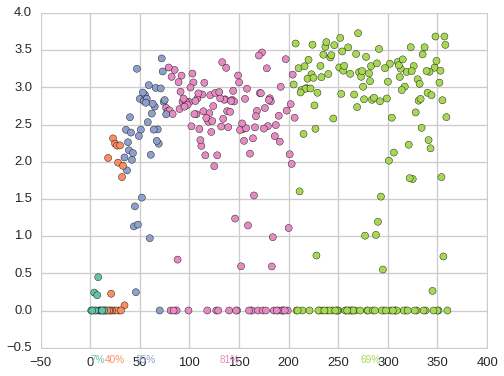

In [34]:
figsize(8, 6)
prog_plot('ENSDARG00000013477')

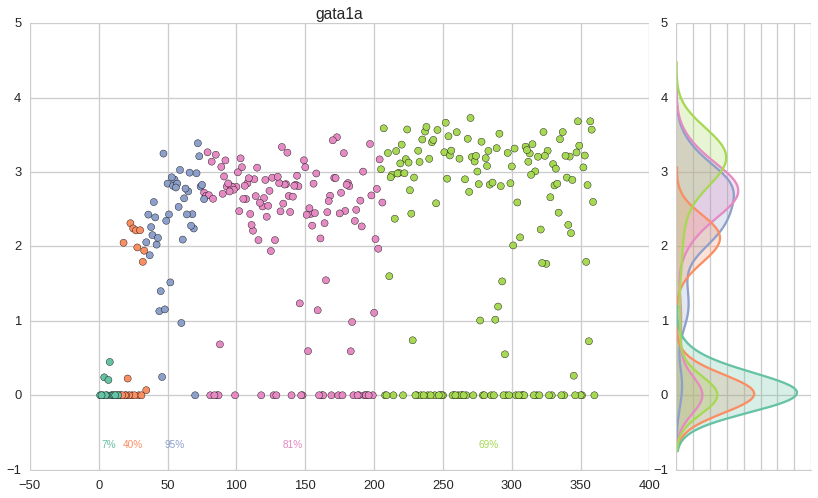

In [35]:
figsize(14, 8)
gene_id = 'ENSDARG00000013477'  # gata1a

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

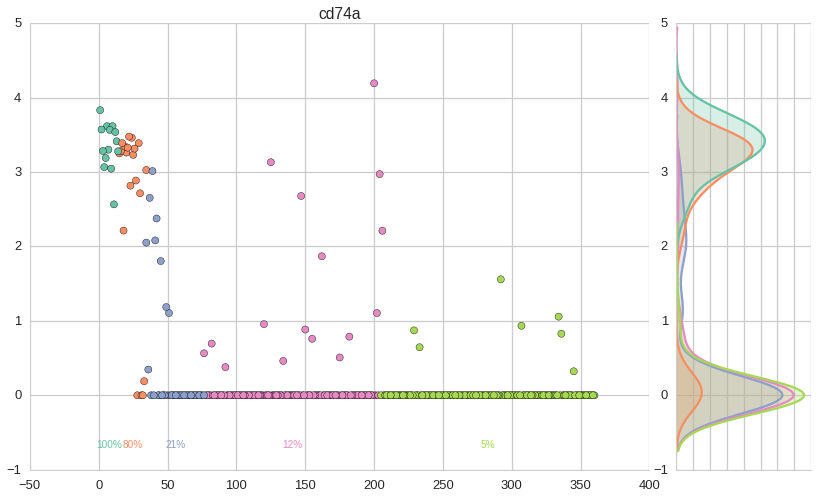

In [36]:
figsize(14, 8)
gene_id = 'ENSDARG00000009087'

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

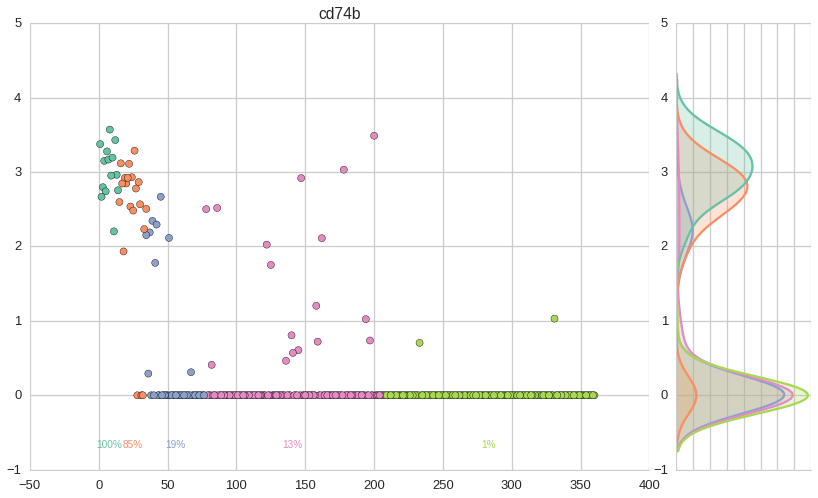

In [37]:
figsize(14, 8)
gene_id = 'ENSDARG00000036628'

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

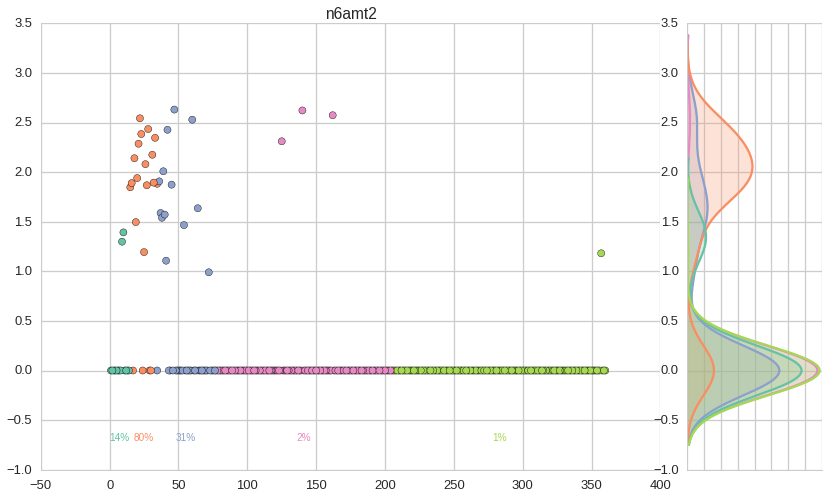

In [38]:
figsize(14, 8)
gene_id = 'ENSDARG00000040584'

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

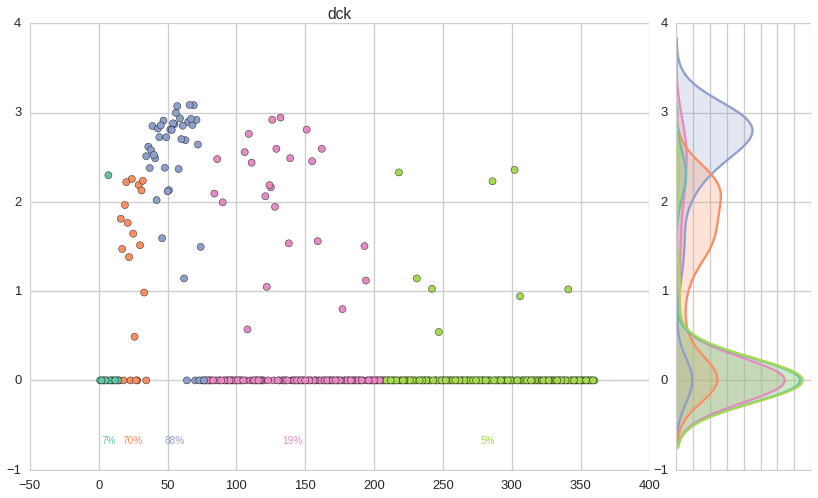

In [39]:
figsize(14, 8)
gene_id = 'ENSDARG00000044807'

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

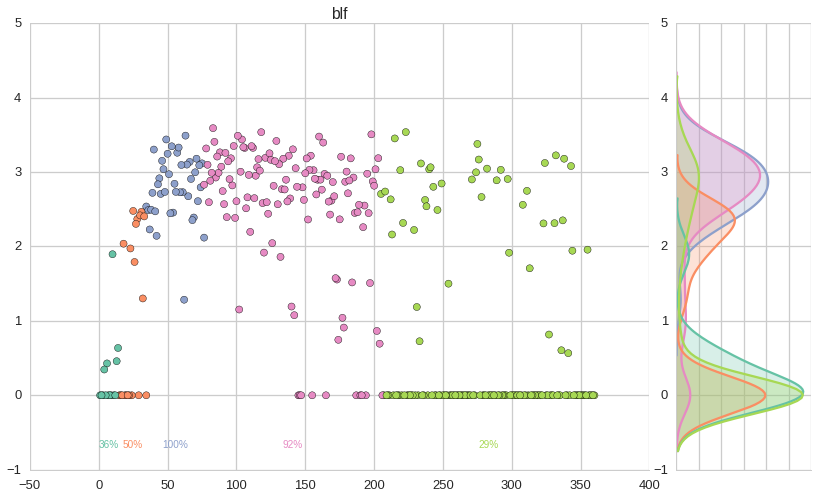

In [40]:
figsize(14, 8)
gene_id = 'ENSDARG00000043126'

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

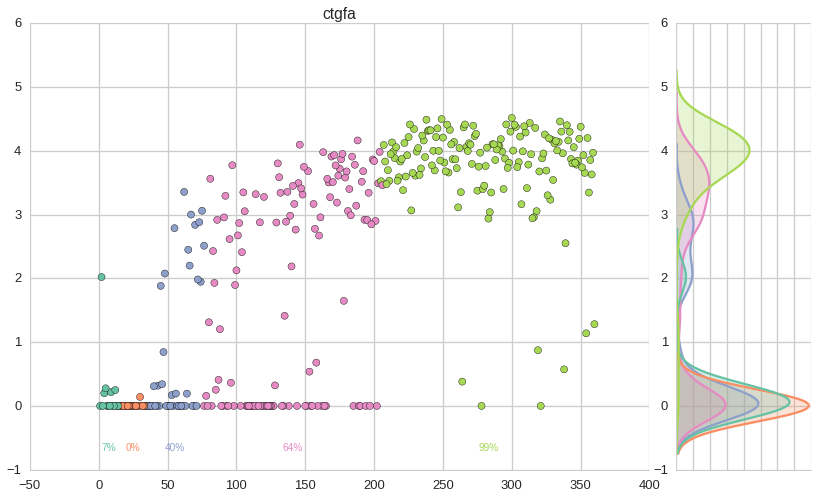

In [41]:
figsize(14, 8)
gene_id = 'ENSDARG00000042934'

ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4, rowspan=3)
prog_plot(gene_id)

plt.subplot2grid((3, 5), (0, 4), rowspan=3, sharey=ax1)

for cl in sample_data.cluster.unique():
    dat = sample_data.query('cluster == "{}"'.format(cl))
    sns.kdeplot(np.log10(egenes[dat.index].ix[gene_id] + 1),
                shade=True,
                legend=False,
                color=dat.iloc[0]['cluster_color'],
                vertical=True,
                bw=0.25);

plt.gca().set_xticklabels([])
plt.ylabel('')

ax1.set_title(gene_annotation['Associated Gene Name'][gene_id]);
sns.despine()

In [42]:
mye_list = [
'ENSDARG00000067797',
'ENSDARG00000000767',
'ENSDARG00000045240',
'ENSDARG00000045959',
'ENSDARG00000019521',
'ENSDARG00000055290',
'ENSDARG00000007889',
'ENSDARG00000088098',
'ENSDARG00000078004',
]

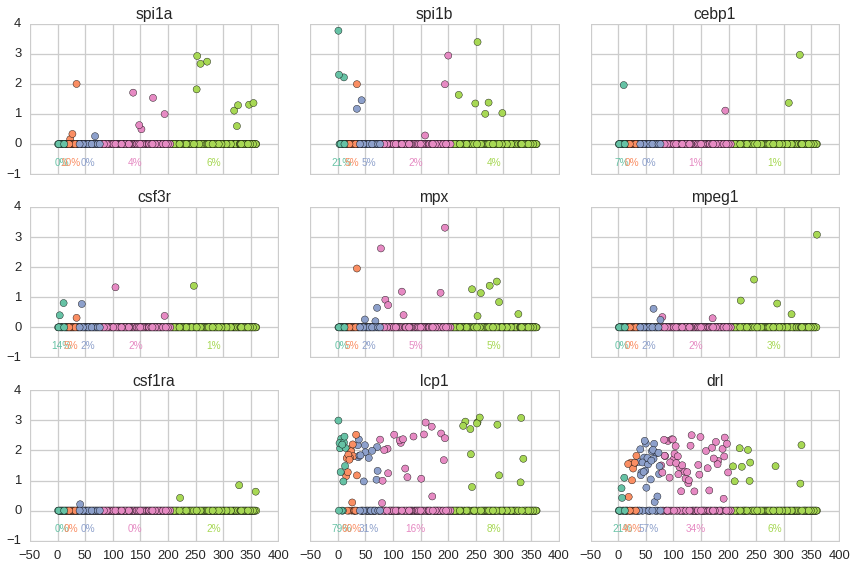

In [43]:
figsize(12, 8)
for i, gene_id in enumerate(mye_list):
    ax = plt.subplot(3, 3, i + 1)
    prog_plot(gene_id)
    if (i + 1) % 3 != 1:
        ax.set_yticklabels([])
    
    if (i + 1) < len(mye_list) - 2:
        ax.set_xticklabels([])
        
    plt.ylim(-1, 4)

    plt.title(gene_annotation['Associated Gene Name'][gene_id])
    
plt.tight_layout();

### Also compare pseudotime with other data

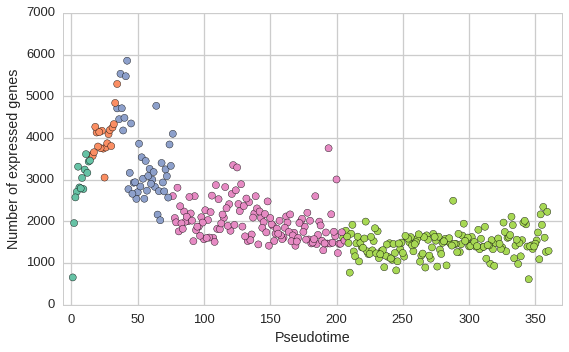

In [44]:
figsize(8, 5)
n_genes = (egenes[sample_data.index] > 1).sum()
plt.scatter(sample_data['pseudotime'].rank(),
                n_genes,
                color=sample_data['cluster_color'],
                edgecolor='k',
                s=50);

plt.xlim(-6, 370)

sns.axlabel('Pseudotime', 'Number of expressed genes')
plt.tight_layout();
plt.savefig('figures/num_genes_progression.pdf')

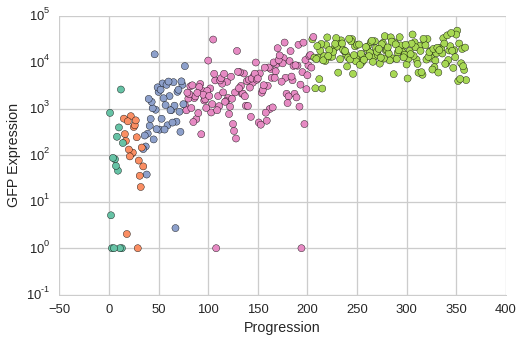

In [45]:
plt.scatter(sample_data['pseudotime'].rank(),
                GFP[sample_data.index] + 1,
                color=sample_data['cluster_color'], s=50, edgecolor='k');
plt.yscale('log');
sns.axlabel('Progression', 'GFP Expression');
sns.despine()

plt.savefig('figures/gfp_rna_time.pdf');

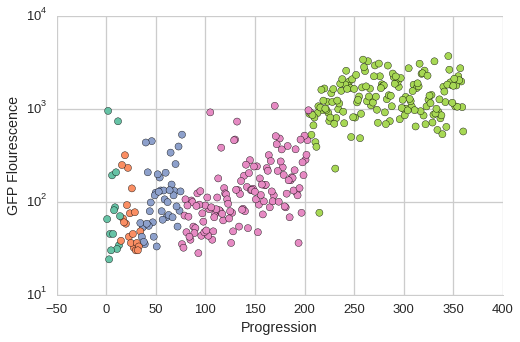

In [46]:
plt.scatter(sample_data['pseudotime'].rank(),
                sample_data['488'],
                color=sample_data['cluster_color'], s=50, edgecolor='k');
plt.yscale('log');
sns.axlabel('Progression', 'GFP Flourescence');
sns.despine()

plt.savefig('figures/gfp_flour_time.pdf');

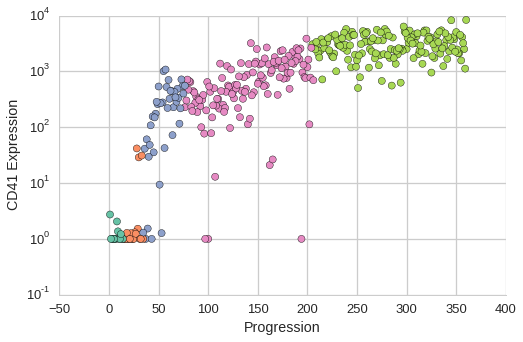

In [47]:
plt.scatter(sample_data['pseudotime'].rank(),
                egenes.ix['ENSDARG00000018687', sample_data.index] + 1,
                color=sample_data['cluster_color'],
                s=50,
                edgecolor='k');
plt.yscale('log');
sns.axlabel('Progression', 'CD41 Expression');
sns.despine()

plt.savefig('figures/cd41_rna_time.pdf');

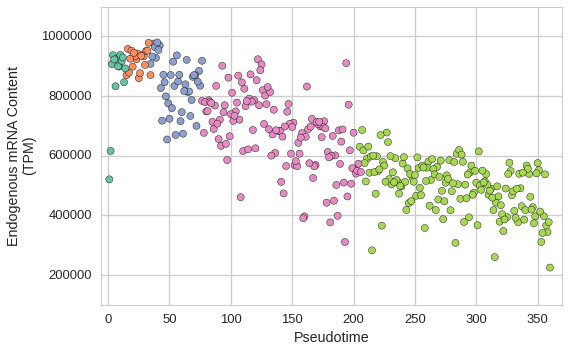

In [48]:
figsize(8, 5)
plt.scatter(sample_data['pseudotime'].rank(),
                1e6 - sample_data['ERCC Content'],
                color=sample_data['cluster_color'], edgecolor='k', s=50);
sns.axlabel('Pseudotime', 'Endogenous mRNA Content\n(TPM)');

plt.xlim(-6, 370)

plt.tight_layout();
plt.savefig('figures/mRNA_progression.pdf')

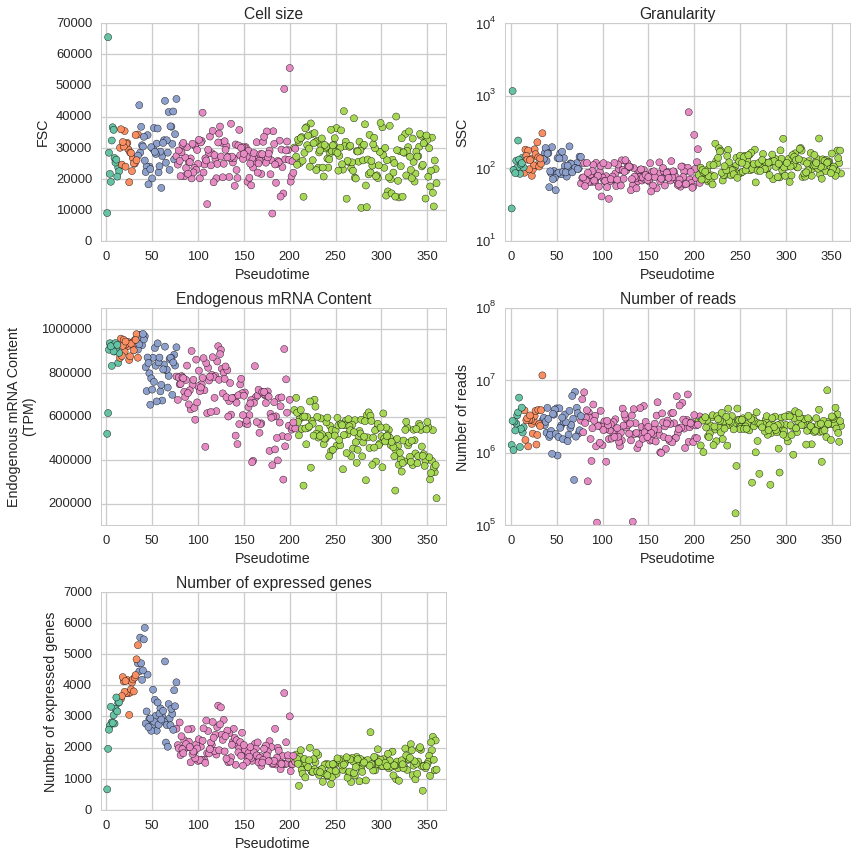

In [49]:
figsize(12, 12)

ax1 = plt.subplot(3, 2, 1)

plt.scatter(sample_data['pseudotime'].rank(),
                sample_data['FSC Horizontal'],
                color=sample_data['cluster_color'], edgecolor='k', s=50);
sns.axlabel('Pseudotime', 'FSC');
plt.title('Cell size')

plt.subplot(3, 2, 2, sharex=ax1)

plt.scatter(sample_data['pseudotime'].rank(),
                sample_data['SSC'],
                color=sample_data['cluster_color'], edgecolor='k', s=50);
sns.axlabel('Pseudotime', 'SSC');
plt.yscale('log');
plt.title('Granularity')

plt.subplot(3, 2, 3, sharex=ax1)

plt.scatter(sample_data['pseudotime'].rank(),
                1e6 - sample_data['ERCC Content'],
                color=sample_data['cluster_color'], edgecolor='k', s=50);
sns.axlabel('Pseudotime', 'Endogenous mRNA Content\n(TPM)');
plt.title('Endogenous mRNA Content')

plt.subplot(3, 2, 4, sharex=ax1)

plt.scatter(sample_data['pseudotime'].rank(),
            sample_data['Number of input reads'],
            color=sample_data['cluster_color'],
            s=50,
            edgecolor='k');

plt.yscale('log')

sns.axlabel('Pseudotime', "Number of reads");
plt.title('Number of reads')

plt.subplot(3, 2, 5, sharex=ax1)

n_genes = (egenes[sample_data.index] > 1).sum()
plt.scatter(sample_data['pseudotime'].rank(),
                n_genes,
                color=sample_data['cluster_color'],
                edgecolor='k',
                s=50);

sns.axlabel('Pseudotime', 'Number of expressed genes')
plt.title('Number of expressed genes')

plt.xlim(-6, 370)

plt.tight_layout();
plt.savefig('figures/pseudotime_qc.pdf')

### Pseudotime correlation

Stating that what we expect to increase with pseudotime is increasing with pseudotime

In [57]:
# itga2b expression
gene_id = 'ENSDARG00000018687'  # itga2b
stats.spearmanr(sample_data['pseudotime'].rank(), egenes.ix[gene_id, sample_data.index])

(0.84985726002519335, 1.279098604347246e-101)

In [62]:
# EGFP expression
stats.spearmanr(sample_data['pseudotime'].rank(), GFP[sample_data.index])

(0.80152563475039418, 5.8727344173336566e-82)

In [61]:
# EGFP flourescence
stats.spearmanr(sample_data['pseudotime'].rank(), sample_data['488'])

(0.82216477664223864, 1.2809503788989228e-89)

### Data correlations

How does physical cell size compare to RNA-content? And how does edogenous expression of the GFP compare to the measured GFP content?

In [64]:
sample_data['condition_color'] = ['#31a354' if c == 'HIGH' else '#e5f5e0' for c in sample_data['condition']]

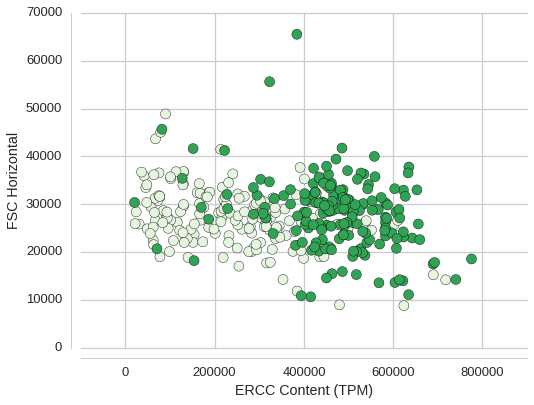

In [65]:
figsize(8, 6)
plt.scatter(sample_data['ERCC Content'],
            sample_data['FSC Horizontal'],
            color=sample_data['condition_color'],
            s=100,
            edgecolor='k');
sns.despine(offset=10)
sns.axlabel('ERCC Content (TPM)', 'FSC Horizontal');

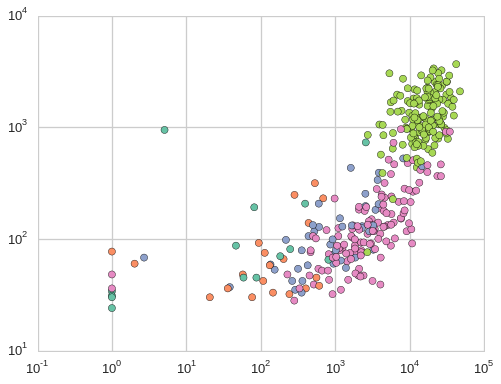

In [66]:
figsize(8, 6)
plt.scatter(GFP[sample_data.index] + 1,
                sample_data['488'],
                color=sample_data['cluster_color'], edgecolor='k', s=50);

plt.loglog();

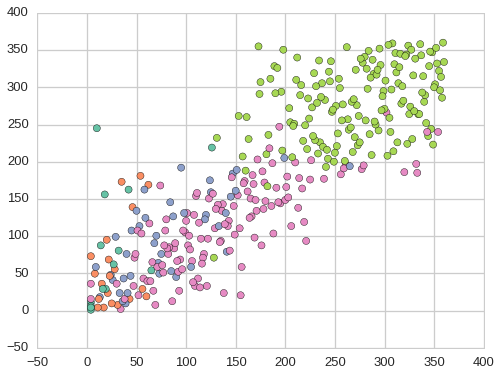

In [67]:
plt.scatter(GFP[sample_data.index].rank(),
                sample_data['488'].rank(),
                color=sample_data['cluster_color'], edgecolor='k', s=50);

Save the pseudotime data

In [68]:
sample_data.to_csv('sample_info_qc_pt.csv')

## Cluster separating markers

Make plots for markers which could be used to isolate members of the clusters by sorting.

In [69]:
marker_genes = \
[
"ENSDARG00000055186",
"ENSDARG00000069440",
"ENSDARG00000059036",
"ENSDARG00000009473",
"ENSDARG00000077760",
"ENSDARG00000063147",

"ENSDARG00000073971",
"ENSDARG00000004724",
"ENSDARG00000078515",
"ENSDARG00000045843",

"ENSDARG00000078945",
"ENSDARG00000057323",
"ENSDARG00000008986",
"ENSDARG00000024488",

"ENSDARG00000038569",

"ENSDARG00000018687",
"ENSDARG00000010785",
"ENSDARG00000042934",
]

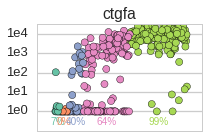

In [70]:
figsize(3, 2)
sns.set_style('whitegrid')

for gene_id in marker_genes:
    plt.clf()
    prog_plot(gene_id)
    plt.ylim(-1, 4.5);

    plt.xticks([]);
    plt.yticks([0, 1, 2, 3, 4], ['1e0', '1e1', '1e2', '1e3', '1e4']);
    plt.title(gene_annotation['Associated Gene Name'][gene_id]);

    plt.tight_layout();
    plt.savefig('figures/marker_plots/' + gene_annotation['Associated Gene Name'][gene_id] + '.pdf')

In [74]:
import matplotlib.gridspec as gridspec

In [147]:
def plot_pair(xg='ENSDARG00000077760', yg='ENSDARG00000073971'):
    bw = 0.5
    gs = gridspec.GridSpec(4, 4)
    ax1 = plt.subplot(gs[1:, :-1])
    
    xe = np.log10(egenes[sample_data.index].ix[xg] + 1)
    ye = np.log10(egenes[sample_data.index].ix[yg] + 1)
    
    mask = xe.where(xe < 0.001).index
    xe[mask] += np.random.uniform(-0.4, -0.1, size=mask.shape)

    mask = ye.where(ye < 0.001).index
    ye[mask] += np.random.uniform(-0.4, -0.1, size=mask.shape)
    
    plt.scatter(xe,
                ye,
                color=sample_data['cluster_color'],
                s=100,
                edgecolor='k')
    
    plt.axhline(0, c='grey', linestyle='--')
    plt.axvline(0, c='grey', linestyle='--')

    sns.axlabel(gene_annotation['Associated Gene Name'][xg] + ' (log10 TPM)',
                gene_annotation['Associated Gene Name'][yg] + ' (log10 TPM)')
    
    plt.subplot(gs[0, :-1], sharex=ax1)
    
    for cl in sample_data.cluster.unique()[::-1]:
        idx = sample_data.query('cluster == "{}"'.format(cl)).index
        sns.kdeplot(xe.ix[idx],
                    bw=bw,
                    legend=False,
                    color=sample_data.ix[idx[0], 'cluster_color'],
                    shade=True)
    
    plt.yticks([])
    
    plt.xlim(-0.5, xe.max() + 0.1);
    
    plt.subplot(gs[1:, -1], sharey=ax1)
    
    for cl in sample_data.cluster.unique()[::-1]:
        idx = sample_data.query('cluster == "{}"'.format(cl)).index
        sns.kdeplot(ye.ix[idx],
                    bw=bw,
                    legend=False,
                    vertical=True,
                    color=sample_data.ix[idx[0], 'cluster_color'],
                    shade=True)
    
    plt.xticks([])

    plt.ylim(-0.5, ye.max() + 0.1);

In [148]:
# ascc1: ENSDARG00000077760
# plgrkt: ENSDARG00000073971

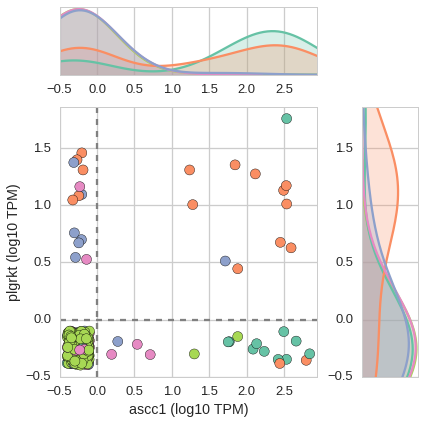

In [154]:
figsize(6, 6)
plot_pair('ENSDARG00000077760', 'ENSDARG00000073971')
plt.tight_layout()
plt.savefig('figures/1a_sorting_pair.pdf')

In [155]:
# mibp: ENSDARG00000078945
# fzd8b: ENSDARG00000038569

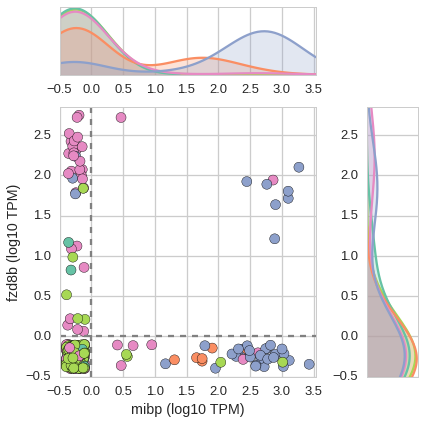

In [156]:
figsize(6, 6)
plot_pair('ENSDARG00000078945', 'ENSDARG00000038569')
plt.tight_layout()
plt.savefig('figures/3_sorting_pair.pdf')

### Make grid_plot of combined runx1 genes

Since the ENSEMBL Zv9 annotation for seem to have split up runx1 in two parts sitting next to each other, we want to merge their expression to one gene.

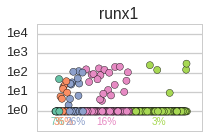

In [157]:
runx1 = ['ENSDARG00000087646','ENSDARG00000025921']

figsize(3, 2)
sns.set_style('whitegrid')


plt.clf()

# prog_plot
plt.scatter(sample_data['pseudotime'].rank(),
            np.log10(egenes[sample_data.index].ix[runx1].sum() + 1),
            color=sample_data['cluster_color'], edgecolor='k', s=50);

tmp_df = sample_data.ix[:, ['cluster', 'pseudotime', 'cluster_color']]
tmp_df['expression'] = egenes.ix[runx1, sample_data.index].sum()
tmp_df['expressed'] = tmp_df['expression'] > 1

cluster_group = tmp_df.groupby('cluster')
expressed_in_cluster = cluster_group.sum()['expressed']
cluster_size = cluster_group.size()
fraction_expressing = expressed_in_cluster / cluster_size

pst_locs = tmp_df.rank().groupby('cluster').mean()['pseudotime']
cl_col = cluster_group.first()['cluster_color']

yloc = cycle([np.log10(2e-1), np.log10(2e-1)])
for fr, psl, clc in zip(fraction_expressing, pst_locs, cl_col):
    plt.text(psl, yloc.next(), '{:2.0%}'.format(fr),
             color=clc,
             horizontalalignment='center')


plt.ylim(-1, 4.5);

plt.xticks([]);
plt.yticks([0, 1, 2, 3, 4], ['1e0', '1e1', '1e2', '1e3', '1e4']);
plt.title('runx1');

plt.tight_layout();

plt.savefig('figures/grid_plots/' + 'runx1_combined' + '.pdf')